In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sys
import matplotlib.pyplot as plt

In [34]:
class BackPropagationAlgo():
   
   #initially define the layers and nodes
    def __init__(self,input_nodes, Layer1, Layer2, output_nodes, lr):
        self.input_nodes = input_nodes
        self.Layer1 = Layer1
        self.Layer2 = Layer2
        self.output_nodes = output_nodes
        self.lr = lr
        
        self.i2Layer1_weight = np.random.normal(0.0, self.input_nodes**-0.5,(self.input_nodes,self.Layer1))
        self.i2Layer1_bias = np.zeros((1, self.Layer1))
            
        self.L1_L2_weight = np.random.normal(0.0, self.Layer1**-0.5,(self.Layer1,self.Layer2))
        self.L1_L2_bias = np.zeros((1, self.Layer2))
        
        self.L2_Out_weight = np.random.normal(0.0, self.Layer2**-0.5,(self.Layer2,self.output_nodes))
        self.L2_Out_bias = np.zeros((1, self.output_nodes))
        
    #Sigmoid Activation Function   
    def sigmoid(self, x):
        return 1/ (1 + np.exp(-x))
    
    #Softmax Activation Function
    def softmax(self, x):
        return (np.exp(x)/np.sum(np.exp(x), axis = 1, keepdims = True))
    
    #Categorical cross entropy loss
    def cross_entropy_loss(self, p, y):
        len_y = len(y)
        ls = np.sum(np.multiply(y, np.log(p).T))
        loss = - (1/len_y) * ls
        return loss
    
    #partial derivative of categorical cross entropy loss
    def derivative_crossEntropy(self, p, y):
        return (p - y)
    
    #Implementing Forward Propagation
    def forward(self, X):
        
        h1_inputs = np.dot(X, self.i2Layer1_weight) + self.i2Layer1_bias
        h1_outputs = self.sigmoid(h1_inputs) 
        
        h2_inputs = np.dot(h1_outputs, self.L1_L2_weight) + self.L1_L2_bias
        h2_outputs = self.sigmoid(h2_inputs)
        
        final_inputs = np.dot(h2_outputs, self.L2_Out_weight) + self.L2_Out_bias
        final_outputs = self.softmax(final_inputs) 
        
        return h1_outputs, h2_outputs, final_outputs
    
    
    #Implementing Back Propagation
    def backpropagation(self, h1_outputs, h2_outputs, final_outputs, X, y):
         
        delta_i2Layer1_weight = np.zeros(self.i2Layer1_weight.shape)
        delta_i2Layer1_bias = np.zeros(self.i2Layer1_bias.shape)
        delta_L1_L2_weight = np.zeros(self.L1_L2_weight.shape)
        delta_L1_L2_bias = np.zeros(self.L1_L2_bias.shape)
        delta_L2_Out_weight = np.zeros(self.L2_Out_weight.shape)
        delta_L2_Out_bias = np.zeros(self.L2_Out_bias.shape)
        
        
        output_error_term = self.derivative_crossEntropy(final_outputs, y)
        delta_L2_Out_weight += np.dot(h2_outputs.T, output_error_term)
        delta_L2_Out_bias += np.sum(output_error_term, axis = 0, keepdims = True)
        
        
        hidden2_error_term = np.dot(output_error_term, self.L2_Out_weight.T)*h2_outputs*(1-h2_outputs)
        delta_L1_L2_weight += np.dot(h1_outputs.T, hidden2_error_term)
        delta_L1_L2_bias += np.sum(hidden2_error_term, axis = 0, keepdims = True)
        
        
        hidden1_error_term = np.dot(hidden2_error_term, self.L1_L2_weight.T)*h1_outputs*(1-h1_outputs)
        delta_i2Layer1_weight += hidden1_error_term * X[:, None]
        delta_i2Layer1_bias += np.sum(hidden1_error_term, axis = 0, keepdims = True)
        
        return delta_i2Layer1_weight, delta_i2Layer1_bias, delta_L1_L2_weight, delta_L1_L2_bias, delta_L2_Out_weight, delta_L2_Out_bias
    
    #Updating Weights here
    def update_weights(self, delta_i2Layer1_weight, delta_i2Layer1_bias, delta_L1_L2_weight, delta_L1_L2_bias, delta_L2_Out_weight, delta_L2_Out_bias, X):
        
        # Updating Layer 2, Layer 1 and Input layer respectively 
        self.L2_Out_weight += -self.lr * (delta_L2_Out_weight /len(X) )
        self.L2_Out_bias += -self.lr * (delta_L2_Out_bias /len(X) )
        
        self.L1_L2_weight += -self.lr * (delta_L1_L2_weight /len(X) )
        self.L1_L2_bias += -self.lr * (delta_L1_L2_bias /len(X) )
        
        self.i2Layer1_weight += -self.lr * (delta_i2Layer1_weight /len(X) )
        self.i2Layer1_bias += -self.lr * (delta_i2Layer1_bias /len(X) )
        
    #Implementing Forward Pass after weight update
    def forward_final_output(self, X):
        
        hidden1_inputs = np.dot(X, self.i2Layer1_weight) + self.i2Layer1_bias
        hidden1_outputs = self.sigmoid(hidden1_inputs) 

        hidden2_inputs = np.dot(hidden1_outputs, self.L1_L2_weight) + self.L1_L2_bias
        hidden2_outputs = self.sigmoid(hidden2_inputs)
        
        final_inputs = np.dot(hidden2_outputs, self.L2_Out_weight) + self.L2_Out_bias
        final_outputs = self.softmax(final_inputs) 
        
        return final_outputs
    
   def get_accuracy_value(self, p, y):

        pre_class = np.argmax(p, axis = 1)
        y_class = np.argmax(y, axis =1)
        equals = (pre_class == y_class)
        
        return np.mean(equals)

In [ ]:
#i_train = subsets(train_labels)
#i_test = subsets(test_labels)

#train_images= train_images[i_train]
#train_labels = train_labels[i_train]

#test_images = test_images[i_test]
#test_labels = test_labels[i_test]


Test loss: 0.091
Test accuracy: 0.96


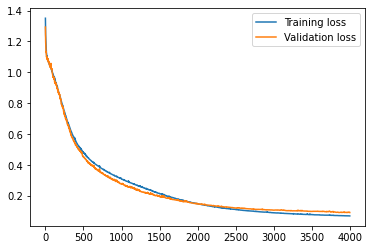

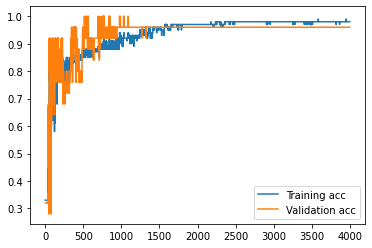

In [38]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

X= iris.iloc[:, 0:4]
X= X.values


X[34][3] = 0.2
X[37][1] = 3.6
X[37][2] = 1.4

Y = iris.iloc[:,4]
Y= Y.values

# Normalizing the inputs
X = X.astype('float32')
X -= np.mean(X, axis = 0)
X /= np.std(X, axis = 0)


for i in range(len(Y)):
    if Y[i] == 'Iris-setosa':
        Y[i] = 0
    elif Y[i] == 'Iris-versicolor':
        Y[i] = 1
    elif Y[i] == 'Iris-virginica':
        Y[i] = 2
        
new_Y = one_hot_encoding(X,Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, new_Y, test_size=1./6, random_state=42, shuffle = True)

X_init_train, X_val, Y_init_train, Y_val = train_test_split(X_train, Y_train, test_size=1./5, random_state=42, shuffle = True)

Y_init_train = Y_init_train.astype('uint8')
Y_val = Y_val.astype('uint8')
Y_test = Y_test.astype('uint8')


#print(X_val.shape)  
#print(Y_init_train.shape)
#print(Y_val.shape)
#print(X_init_train.shape)

input_nodes = X_init_train.shape[1] 
hidden1_nodes = 30
hidden2_nodes = 20
output_nodes = 3
learning_rate = 0.01
epochs = 4000

BPAlgo = BackPropagationAlgo(input_nodes, hidden1_nodes, hidden2_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
accuracies = {'train':[], 'validation':[]}

# Training the network 
for epoch in range(epochs):
    batch = np.random.choice(X_init_train.shape[0], size=16)
    X_batch, y_batch = X_init_train[batch], Y_init_train[batch]
                             
    for X, y in zip(X_batch, y_batch):
        
        hidden1_outputs, hidden2_outputs, final_outputs = BPAlgo.forward(X)
        
        delta_i2Layer1_weight, delta_i2Layer1_bias, delta_L1_L2_weight, delta_L1_L2_bias, delta_L2_Out_weight, delta_L2_Out_bias = BPAlgo.backpropagation(hidden1_outputs,
                                                                                                                              hidden2_outputs,
                                                                                                                              final_outputs, X, y)

        BPAlgo.update_weights(delta_i2Layer1_weight, delta_i2Layer1_bias, delta_L1_L2_weight, delta_L1_L2_bias, delta_L2_Out_weight, delta_L2_Out_bias, X)
    
    # Calculating training loss and training accuracy after each update of weights and running the dorward pass again
    out_tr = BPAlgo.forward_final_output(X_init_train)
    train_loss = BPAlgo.cross_entropy_loss(out_tr.T, Y_init_train)
    
    train_acc = BPAlgo.get_accuracy_value(out_tr, Y_init_train)
    
    # Calculating validation loss and validation accuracy    
    out_val = BPAlgo.forward_final_output(X_val)
    val_loss = BPAlgo.cross_entropy_loss(out_val.T, Y_val)
    
    val_acc = BPAlgo.get_accuracy_value(out_val, Y_val)
       
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)
    accuracies['train'].append(train_acc)
    accuracies['validation'].append(val_acc)
    
# Testing the updated model parameters on Test data

out_test = BPAlgo.forward_final_output(X_test)
test_loss = BPAlgo.cross_entropy_loss(out_test.T, Y_test)
test_acc = BPAlgo.get_accuracy_value(out_test, Y_test)

print("Test loss: " + str(test_loss)[:5])
print("Test accuracy: " + str(test_acc)[:5])


plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()
plt.show()


plt.plot(accuracies['train'], label='Training acc')
plt.plot(accuracies['validation'], label='Validation acc')
plt.legend()
_ = plt.ylim()
plt.show()

